## EXPLORING TIK TOK ANALYTICS

Part I) Features vs Date
1. [WashU Views v.s. Date](#1.-WashU-Views-v.s.-Time)
2. [Views, Likes, Comments, Shares and Saves V.S. Date](#2.-WashU-{Views-+-Likes-+-Comments-+-Shares-+-Saves}-V.S.-Time)
3. [Gender Viewer % V.S. Date](#3.-Gender-Viewer-%-V.S.-Date)
4. [Video Duration & Average View Time V.S. Date](#4.-Video-Duration-&-Average-View-Time-V.S.-Date)
5. [New Followers V.S. Date](#5.-New-Followers-V.S.-Date)
6. [Age Groups V.S. Date](#6.-Age-Groups-V.S.-Date)
7. [New Viewers v.s. Date](#7.-New-Viewers-v.s.-Date)

In [1]:
from os.path import exists

data_dir = 'utility/data'

assert exists(f'{data_dir}/tiktok_data.csv'), 'Loan data file is missing.'

In [2]:
import pandas as pd

data = pd.read_csv(f'{data_dir}/tiktok_data.csv')
df = data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from utility.util import configure_plots
# configure_plots()
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib.patches import Patch
from wordcloud import WordCloud

The following is data of @washu Tik Tok Analytics from 1/3/24 to 5/30/24:

In [4]:
data.head(10)

,ID,Date,Day of week,Time of day,Platform,Video or Image?,Views (in thousands),Likes,Comments,Shares,...,Video Duration (s),Avg View Time (s),New Followers,Aged 18-24 %,25-34 %,35-44 %,45-54 %,55+ %,New Viewers %,Non Followers %
0,1,1/3/2024,Wednesday,12:46,TikTok,Image,19.2,1500,23,31,...,NaN,NaN,68,0.70,0.18,0.05,0.05,0.02,0.46,0.81
1,2,1/23/2024,Tuesday,10:14,TikTok,Video,7.8,410,8,40,...,101.0,16.8,10,0.72,0.17,0.04,0.05,0.02,0.29,0.61
2,3,1/31/2024,Wednesday,13:21,TikTok,Video,6.2,397,1,2,...,10.0,5.0,7,0.71,0.17,0.05,0.05,0.02,0.35,0.65
3,4,2/2/2024,Friday,11:47,TikTok,Video,4.5,261,3,10,...,20.0,6.3,4,0.68,0.18,0.05,0.06,0.02,0.32,0.60
4,5,2/5/2024,Monday,11:24,TikTok,Image,3.9,151,1,12,...,NaN,NaN,3,0.71,0.17,0.05,0.04,0.02,0.39,0.69
5,6,2/6/2024,Tuesday,10:50,TikTok,Video,16.1,1600,18,19,...,16.0,9.4,8,0.76,0.17,0.03,0.03,0.02,0.53,0.80
6,7,2/7/2024,Wednesday,13:19,TikTok,Video,65.4,15800,126,491,...,15.5,9.2,58,0.80,0.16,0.02,0.01,0.02,0.80,0.95
7,8,2/8/2024,Thursday,14:17,TikTok,Video,"1,400.0",218500,137,838,...,5.0,8.4,531,0.77,0.17,0.03,0.02,0.02,0.90,1.00
8,9,2/9/2024,Friday,12:42,TikTok,Video,5.2,281,4,30,...,57.0,9.8,4,0.67,0.19,0.05,0.06,0.02,0.29,0.57
9,10,2/13/2024,Tuesday,9:49,TikTok,Video,6.7,451,2,46,...,76.0,13.7,2,0.67,0.19,0.05,0.06,0.02,0.25,0.60


And the following are the list of features the tiktoks will be analyzed based on:

In [5]:
print(data.columns)

Index(['ID', 'Date', 'Day of week', 'Time of day', 'Platform',
       'Video or Image?', 'Views (in thousands)', 'Likes', 'Comments',
       'Shares', 'Saves/Bookmarks', 'Keywords', 'Hashtags', 'Mentions',
       'Food Tok', 'Dorm Tok', 'Beauty', 'Original Aud', 'Male Viewers',
       'Female Viewers', 'Video Duration (s)', 'Avg View Time (s)',
       'New Followers', 'Aged 18-24 %', '25-34 %', '35-44 % ', '45-54 %',
       '55+ %', 'New Viewers %', 'Non Followers %'],
      dtype='object')


## I) Analyzing Individual Features over Time (Date)

### 1. WashU Views v.s. Time

The following is a scatterplot of the views WashU Recieved over time:

In [6]:
df['Views (in thousands)'] = df['Views (in thousands)'].str.replace(',', '')

# Convert 'Views (in thousands)' column to float
df['Views (in thousands)'] = df['Views (in thousands)'].astype(float)

# Multiply 'Views (in thousands)' column by 1000
df['Views (in thousands)'] *= 1000

# Rename 'Views (in thousands)' column to 'Views'
df.rename(columns={'Views (in thousands)': 'Views'}, inplace=True)

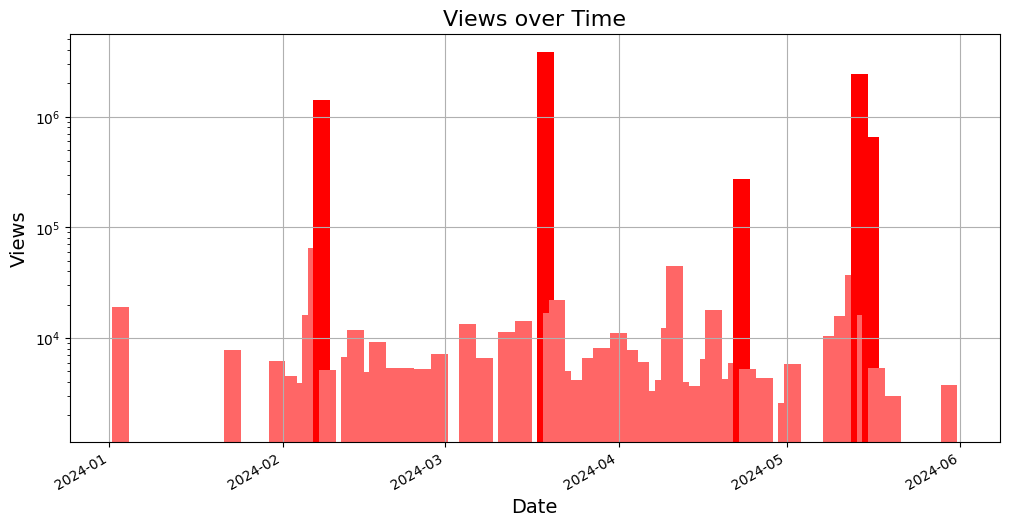

In [7]:
# Convert 'Views (in thousands)' column to int64
# df['Views (in thousands)'] = df['Views (in thousands)'].astype('int64')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

colors = ['#FF6666' if views < 10**5 else '#FF0000' for views in df['Views']]

# bar graph
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
plt.bar(df['Date'], df['Views'], width=3, color=colors) 
# formatting
plt.title('Views over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.grid(True)
# Rotate date labels for better readability
plt.gcf().autofmt_xdate()
# Log scale the y-axis
plt.yscale('log')
# Show plot
plt.show()

In this bar chart, there are 5 instances where views exceed 100,000. These spikes will be looked into further into this project

Average Views: 123925.67567567568


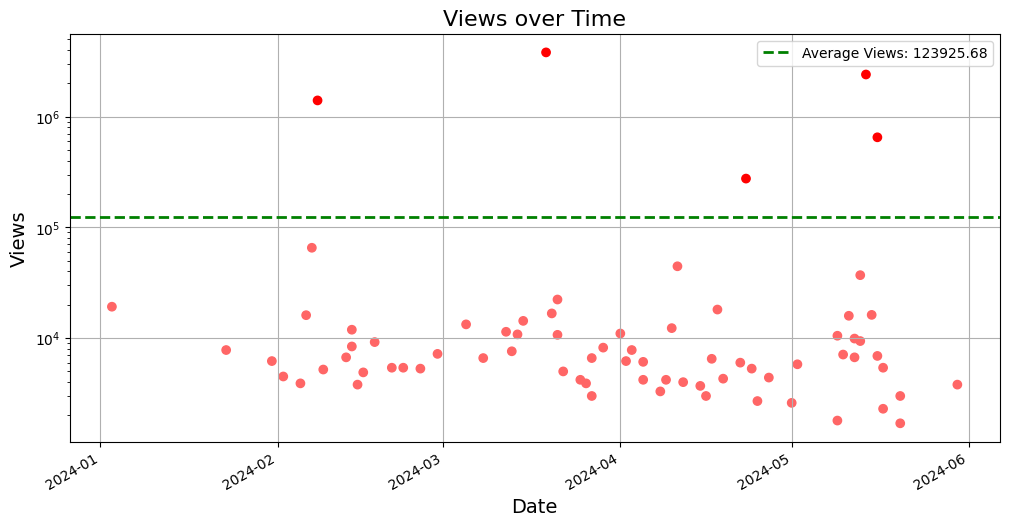

In [8]:
# scatter plot
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
plt.scatter(df['Date'], df['Views'], color = colors)

# Calculate the average views
average_views = df['Views'].mean()
print("Average Views:", average_views)


# formatting
plt.title('Views over Time', fontsize=16)

plt.axhline(y=average_views, color='green', linestyle='--', linewidth=2, label=f'Average Views: {average_views:.2f}')


plt.xlabel('Date', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.grid(True)
# Rotate date labels for better readability
plt.gcf().autofmt_xdate()
# Log scale the y-axis
plt.yscale('log')
plt.legend()
plt.show()

In this scatter plot, there lies a green line which represents the overall average views, which perfectly splits the 5 spikes from the rest of the data. These however to appear more like outliers. 
Let's take a closer look at the views data & outliers with a box plot:

Average Views: 123925.67567567568


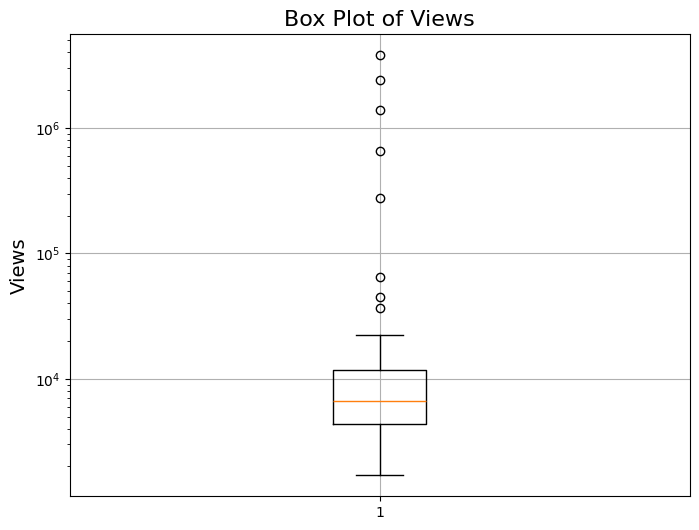

count    7.400000e+01
mean     1.239257e+05
std      5.431393e+05
min      1.700000e+03
25%      4.325000e+03
50%      6.650000e+03
75%      1.177500e+04
max      3.800000e+06
Name: Views, dtype: float64


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Calculate the average views
average_views = df['Views'].mean()
print("Average Views:", average_views)

# Create a box plot for the 'Views' column
plt.figure(figsize=(8, 6))  # Set figure size
plt.boxplot(df['Views'])

# Formatting
plt.title('Box Plot of Views', fontsize=16)
plt.ylabel('Views', fontsize=14)
plt.grid(True)
plt.yscale('log')
# Show plot
plt.show()

desc_stats = df['Views'].describe()
print(desc_stats)

What the box plot is telling us is that there are roughly 9 outliers in our data (spikes). The numbers that exceed [Q3 + 1.5 IQR] are considered outliers. so in this case, [1.177500e+04 + 1.5(1.177500e+04 - 4.225000e+03)] = 19,325 Views are considered so high compared to the rest of our data that they are written as outliers.

In [10]:
threshold = 19325

outliers = df['Views'] > threshold
normaldata = df['Views'] <= threshold

df[outliers].head(9)


,ID,Date,Day of week,Time of day,Platform,Video or Image?,Views,Likes,Comments,Shares,...,Video Duration (s),Avg View Time (s),New Followers,Aged 18-24 %,25-34 %,35-44 %,45-54 %,55+ %,New Viewers %,Non Followers %
6,7,2024-02-07,Wednesday,13:19,TikTok,Video,65400.0,15800,126,491,...,15.50,9.2,58,0.80,0.16,0.02,0.01,0.02,0.80,0.95
7,8,2024-02-08,Thursday,14:17,TikTok,Video,1400000.0,218500,137,838,...,5.00,8.4,531,0.77,0.17,0.03,0.02,0.02,0.90,1.00
25,26,2024-03-19,Tuesday,14:56,TikTok,Video,3800000.0,383700,1300,4600,...,140.00,33.5,2263,0.50,0.35,0.09,0.04,0.02,0.89,1.00
28,29,2024-03-21,Thursday,16:18,TikTok,Video,22300.0,1100,6,21,...,117.00,24.4,14,0.61,0.29,0.05,0.03,0.02,0.68,0.92
43,44,2024-04-11,Thursday,11:30,TikTok,Video,44500.0,2700,39,314,...,47.40,15.8,51,0.71,0.20,0.04,0.03,0.02,0.31,0.93
51,52,2024-04-23,Tuesday,11:32,TikTok,Video,275600.0,18000,99,567,...,210.00,21.6,326,0.64,0.20,0.06,0.06,0.02,0.52,0.99
63,64,2024-05-13,Monday,11:31,TikTok,Video,37000.0,2300,11,41,...,45.70,17.4,20,0.71,0.22,0.04,0.02,0.02,0.23,0.94
65,66,2024-05-14,Tuesday,15:40,TikTok,Video,2400000.0,322900,1100,13100,...,11.05,6.7,1491,0.42,0.39,0.11,0.05,0.03,0.79,1.00
68,69,2024-05-16,Thursday,15:37,TikTok,Video,650200.0,85100,989,7700,...,73.80,16.9,1075,0.21,0.40,0.22,0.11,0.06,0.64,0.99


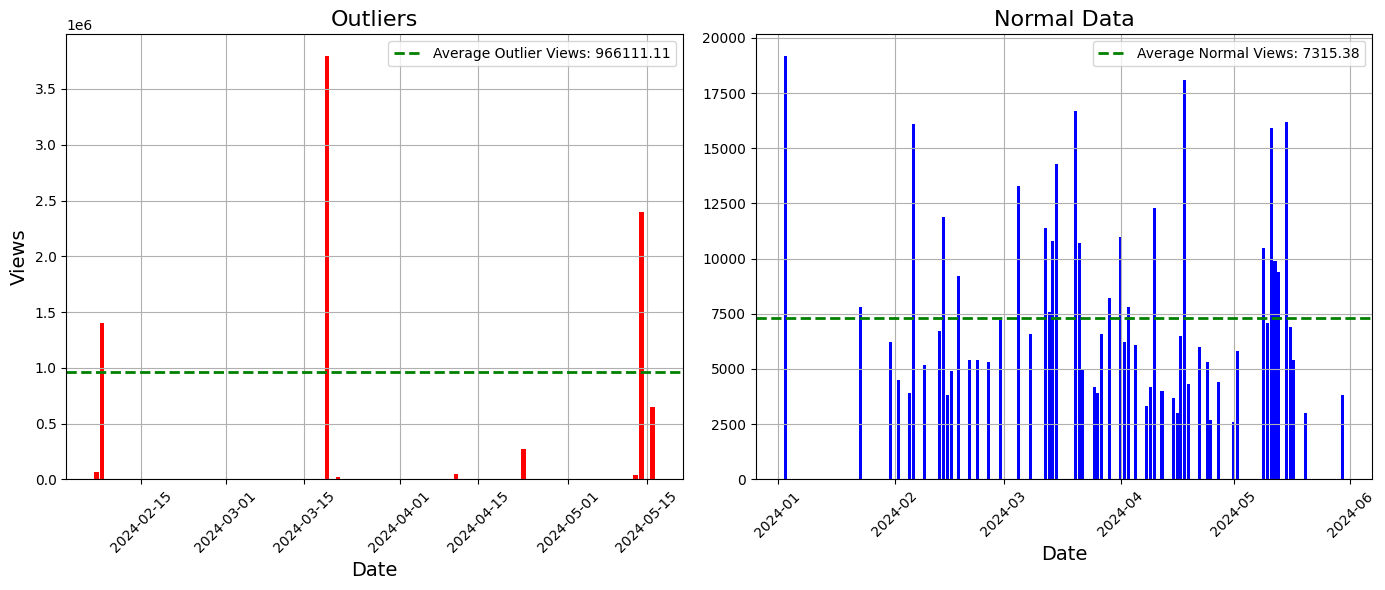

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

average_outlierviews = df[outliers]['Views'].mean()
average_normalviews = df[normaldata]['Views'].mean()

# Plot outliers
axes[0].bar(df[outliers]['Date'], df[outliers]['Views'], color='red')
axes[0].set_title('Outliers', fontsize=16)
axes[0].set_xlabel('Date', fontsize=14)
axes[0].set_ylabel('Views', fontsize=14)
axes[0].grid(True)
axes[0].axhline(y=average_outlierviews, color='green', linestyle='--', linewidth=2, label=f'Average Outlier Views: {average_outlierviews:.2f}')
axes[0].legend()
# Rotate date labels for better readability
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)

# Plot normal data
axes[1].bar(df[normaldata]['Date'], df[normaldata]['Views'], color='blue')
axes[1].set_title('Normal Data', fontsize=16)
axes[1].set_xlabel('Date', fontsize=14)
axes[1].grid(True)
axes[1].axhline(y=average_normalviews, color='green', linestyle='--', linewidth=2, label=f'Average Normal Views: {average_normalviews:.2f}')

# Rotate date labels for better readability
for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)

# Show plot
plt.tight_layout()
plt.legend()
plt.show()

lets also graph a box plot of the non-outlier data to get a better understanding of the spread:

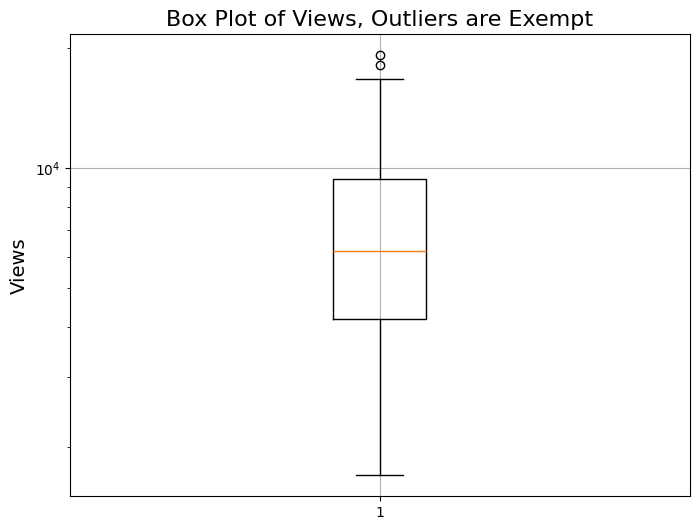

count       65.000000
mean      7315.384615
std       4260.693560
min       1700.000000
25%       4200.000000
50%       6200.000000
75%       9400.000000
max      19200.000000
Name: Views, dtype: float64


In [12]:
# Create a box plot for the 'Views' column
plt.figure(figsize=(8, 6))  # Set figure size
plt.boxplot(df[normaldata]['Views'])

# Formatting
plt.title('Box Plot of Views, Outliers are Exempt', fontsize=16)
plt.ylabel('Views', fontsize=14)
plt.grid(True)
plt.yscale('log')
# Show plot
plt.show()

desc_normstats = df[normaldata]['Views'].describe()
print(desc_normstats)

Compared to a standard deviation of 543,168.7 views (of the overall data), when ignoring the outliers/spikes in views, considering a normal and consistent posting schedule we have a standard deviation of 4304 views, which displays much more stability in our content and viewership.

Lastly, we want to explore the threshold of 10k views as being "viral". Let's now explore our data revolving around content that went viral:

In [13]:
viral = df['Views'] > 10000

viral_percent = viral.sum() / len(df)
print("Percentage of Viral Views:", viral_percent)

Percentage of Viral Views: 0.32432432432432434


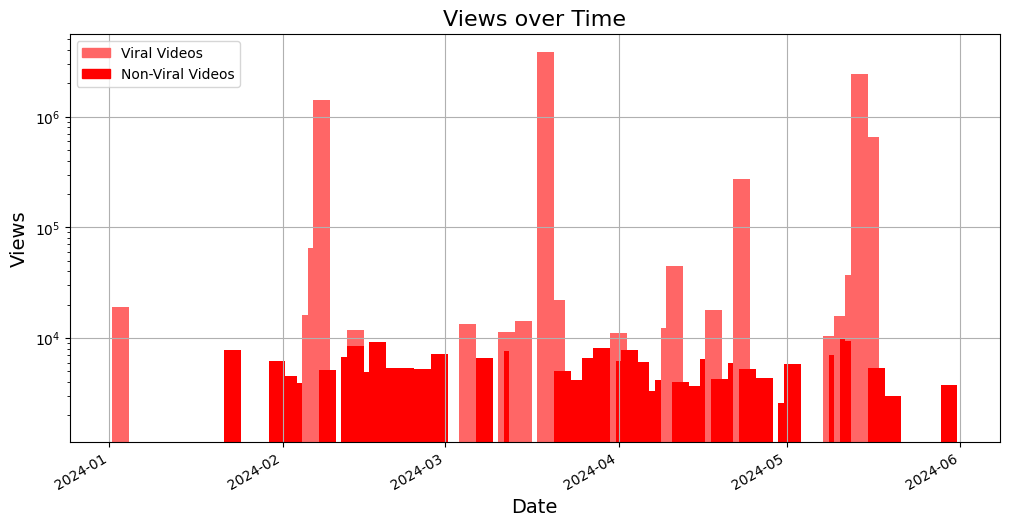

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
colors = ['#FF6666' if is_viral else '#FF0000' for is_viral in viral]

plt.figure(figsize=(12, 6)) 
plt.bar(df['Date'], df['Views'], width=3, color=colors)  

plt.title('Views over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.grid(True)
plt.gcf().autofmt_xdate()

# Log scale the y-axis
plt.yscale('log')

# Create legend labels
legend_labels = ['Viral Videos', 'Non-Viral Videos']
legend_colors = ['#FF6666', '#FF0000']
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, loc='upper left')

plt.show()

### 2. WashU {Views + Likes + Comments + Shares + Saves} V.S. Time

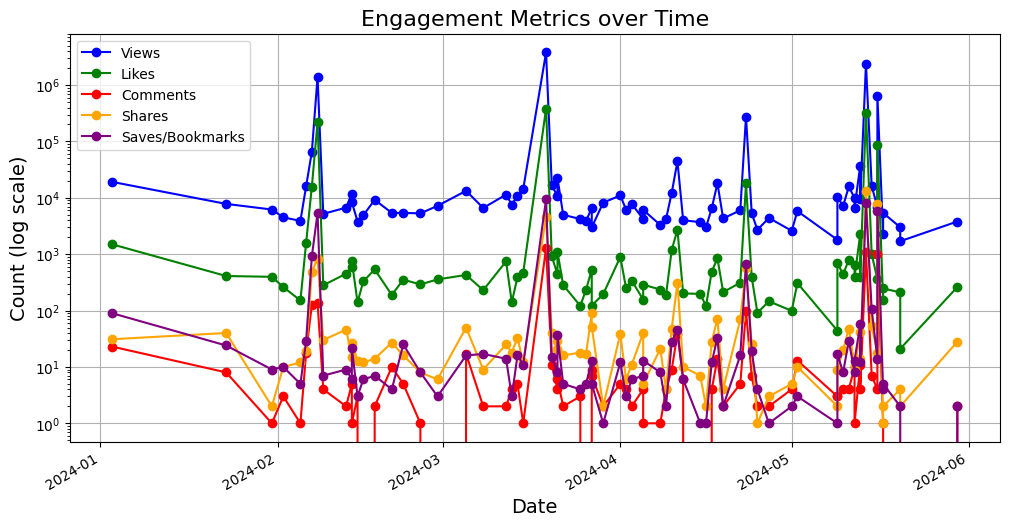

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot 'Views' vs 'Date'
plt.plot(df['Date'], df['Views'], marker='o', linestyle='-', color='blue', label='Views')

# Plot 'Likes' vs 'Date'
plt.plot(df['Date'], df['Likes'], marker='o', linestyle='-', color='green', label='Likes')

# Plot 'Comments' vs 'Date'
plt.plot(df['Date'], df['Comments'], marker='o', linestyle='-', color='red', label='Comments')

# Plot 'Shares' vs 'Date'
plt.plot(df['Date'], df['Shares'], marker='o', linestyle='-', color='orange', label='Shares')

# Plot 'Saves/Bookmarks' vs 'Date'
plt.plot(df['Date'], df['Saves/Bookmarks'], marker='o', linestyle='-', color='purple', label='Saves/Bookmarks')

# Formatting
plt.title('Engagement Metrics over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count (log scale)', fontsize=14)
plt.grid(True)
plt.yscale('log')  # Log scale for better visualization

# Add legend
plt.legend()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show plot
plt.show()

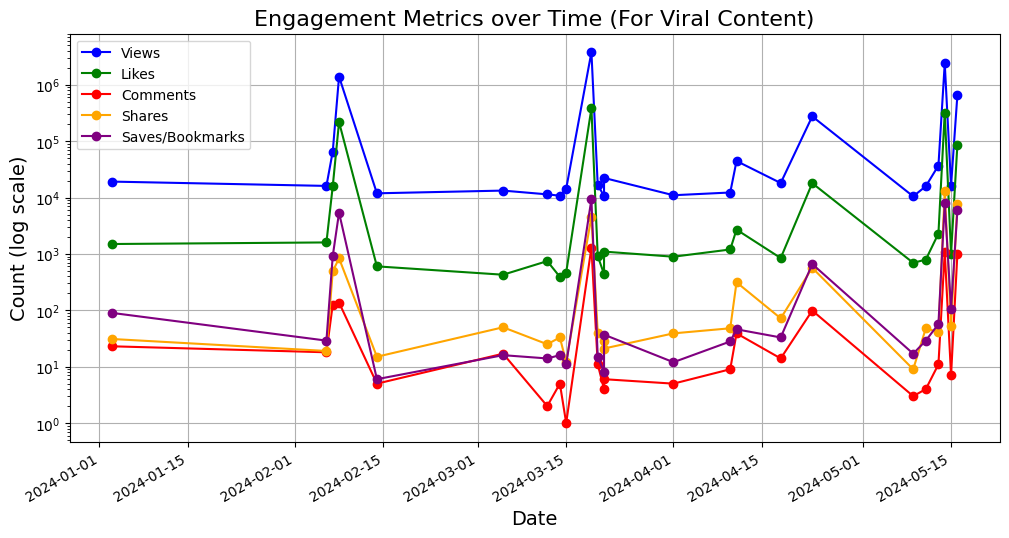

In [16]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot 'Views' vs 'Date'
plt.plot(df[viral]['Date'], df[viral]['Views'], marker='o', linestyle='-', color='blue', label='Views')

# Plot 'Likes' vs 'Date'
plt.plot(df[viral]['Date'], df[viral]['Likes'], marker='o', linestyle='-', color='green', label='Likes')

# Plot 'Comments' vs 'Date'
plt.plot(df[viral]['Date'], df[viral]['Comments'], marker='o', linestyle='-', color='red', label='Comments')

# Plot 'Shares' vs 'Date'
plt.plot(df[viral]['Date'], df[viral]['Shares'], marker='o', linestyle='-', color='orange', label='Shares')

# Plot 'Saves/Bookmarks' vs 'Date'
plt.plot(df[viral]['Date'], df[viral]['Saves/Bookmarks'], marker='o', linestyle='-', color='purple', label='Saves/Bookmarks')

# Formatting
plt.title('Engagement Metrics over Time (For Viral Content)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count (log scale)', fontsize=14)
plt.grid(True)
plt.yscale('log')  # Log scale for better visualization

# Add legend
plt.legend()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show plot
plt.show()

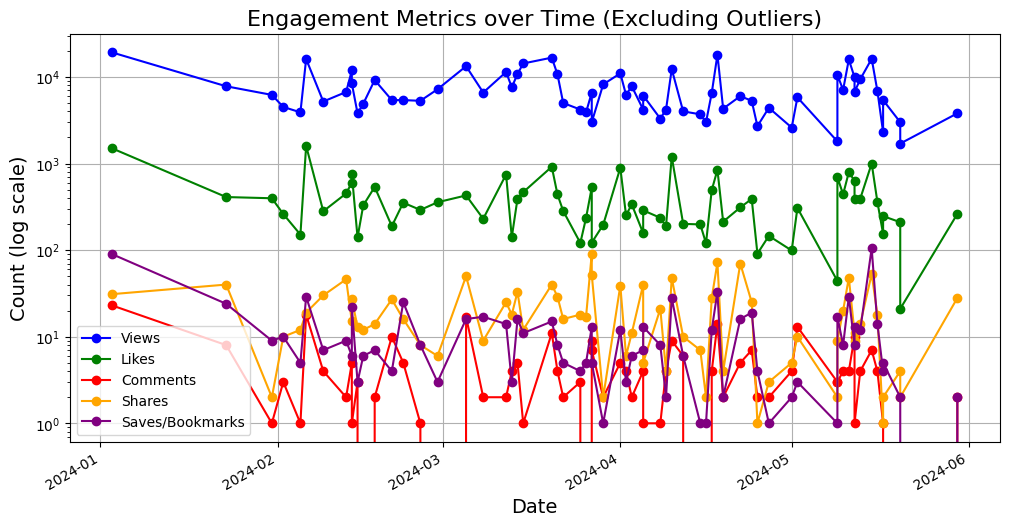

In [17]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot 'Views' vs 'Date'
plt.plot(df[normaldata]['Date'], df[normaldata]['Views'], marker='o', linestyle='-', color='blue', label='Views')

# Plot 'Likes' vs 'Date'
plt.plot(df[normaldata]['Date'], df[normaldata]['Likes'], marker='o', linestyle='-', color='green', label='Likes')

# Plot 'Comments' vs 'Date'
plt.plot(df[normaldata]['Date'], df[normaldata]['Comments'], marker='o', linestyle='-', color='red', label='Comments')

# Plot 'Shares' vs 'Date'
plt.plot(df[normaldata]['Date'], df[normaldata]['Shares'], marker='o', linestyle='-', color='orange', label='Shares')

# Plot 'Saves/Bookmarks' vs 'Date'
plt.plot(df[normaldata]['Date'], df[normaldata]['Saves/Bookmarks'], marker='o', linestyle='-', color='purple', label='Saves/Bookmarks')

# Formatting
plt.title('Engagement Metrics over Time (Excluding Outliers)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count (log scale)', fontsize=14)
plt.grid(True)
plt.yscale('log')  # Log scale for better visualization

# Add legend
plt.legend()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show plot
plt.show()

Lets explore the percent of viewers who liked the tik toks with the formula: like_percent = likes/views, and then graph that over time.

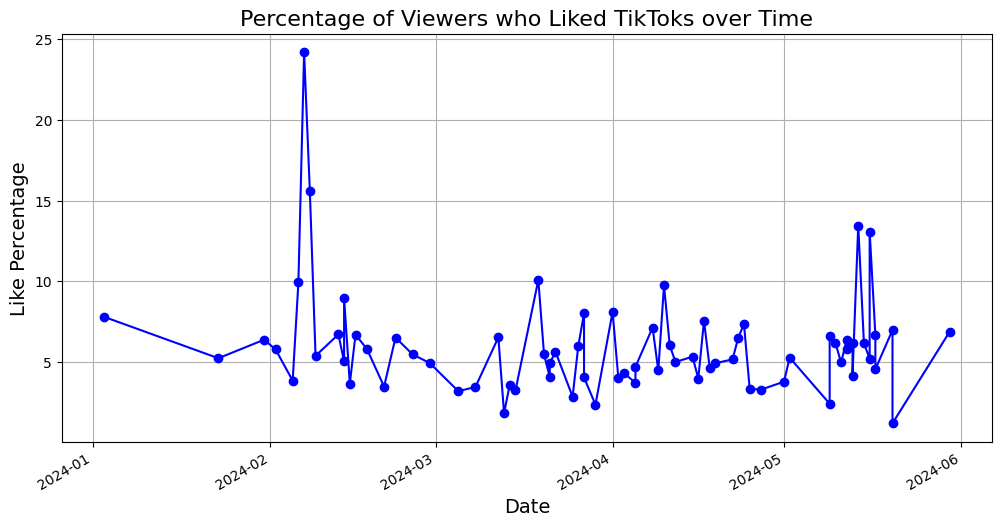

In [18]:
df['Like_Percent'] = df['Likes'] / df['Views'] * 100

# Plot 'Like_Percent' vs 'Date'
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(df['Date'], df['Like_Percent'], marker='o', linestyle='-', color='blue')

# Formatting
plt.title('Percentage of Viewers who Liked TikToks over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Like Percentage', fontsize=14)
plt.grid(True)

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show plot
plt.show()

Lets single out the data that got exceptional like percentage reception:

In [19]:
goodlikes = df['Like_Percent'] > 10

# Filter the DataFrame based on the 'goodlikes' condition
df_goodlikes = df[goodlikes]

# Compute the correlation matrix
correlation_matrix = df_goodlikes.corr()

# If you're interested in the correlation of 'goodlikes' with other features:
goodlikes_correlation = correlation_matrix['Likes']
print("\nCorrelation of 'Likes' with other features:")
print(goodlikes_correlation)


Correlation of 'Likes' with other features:
ID                    0.153651
Views                 0.968545
Likes                 1.000000
Comments              0.637665
Shares                0.416759
Saves/Bookmarks       0.904156
Male Viewers          0.233650
Female Viewers       -0.287710
Video Duration (s)    0.405580
Avg View Time (s)     0.451805
New Followers         0.843148
Aged 18-24 %         -0.181049
25-34 %               0.436456
35-44 %              -0.016064
45-54 %              -0.074765
55+ %                -0.337594
New Viewers %         0.546409
Non Followers %       0.793531
Like_Percent         -0.771503
Name: Likes, dtype: float64


C:\Users\Lionb\AppData\Local\Temp\ipykernel_23772\4131609326.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_goodlikes.corr()


Lets observe our 'goodlikes' videos and explore their interactions with Saves, Male/Female Viewers, New Followers, Views, Age Groups, and New Viewers!

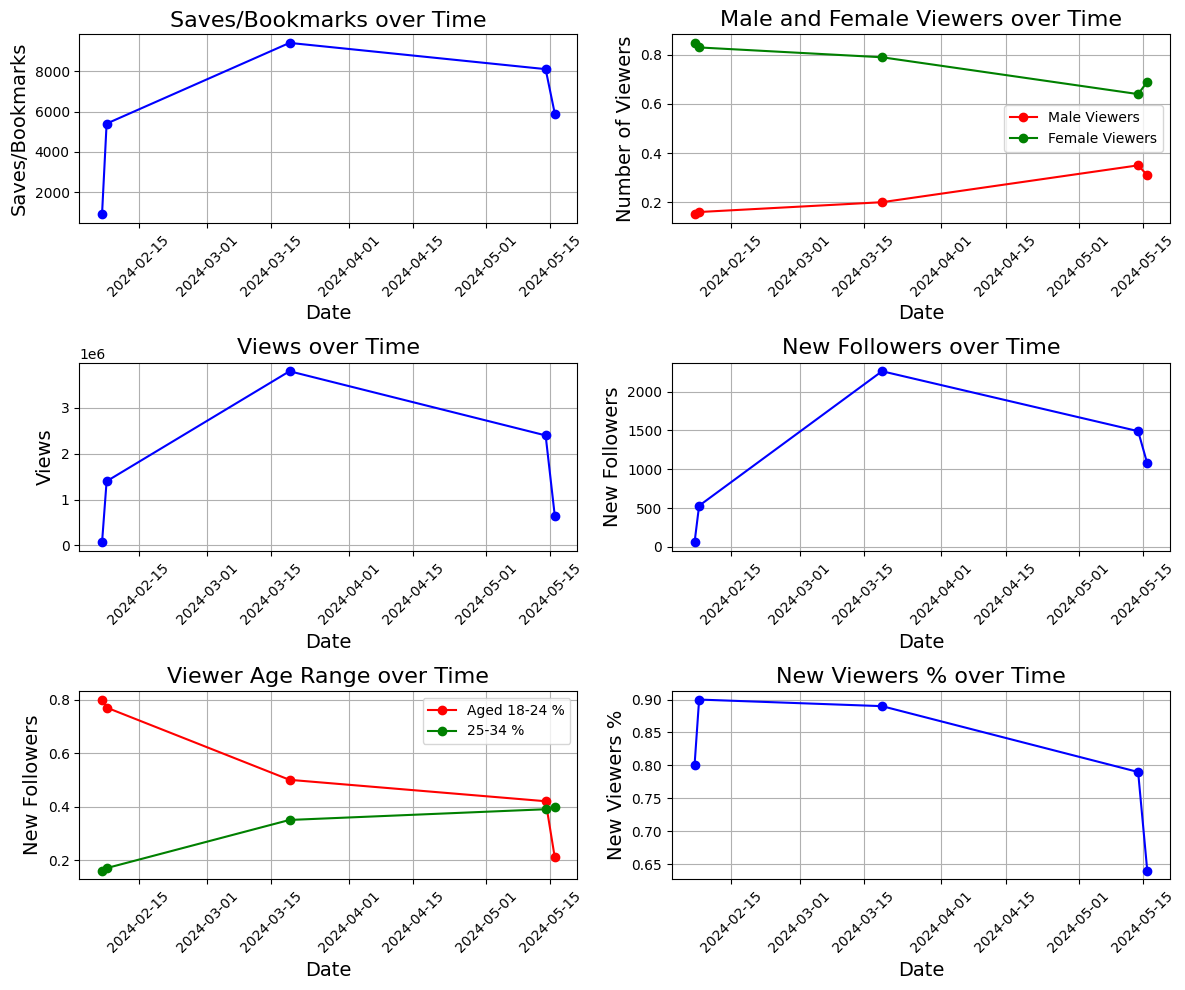

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Subplot 1: 'Saves/Bookmarks' vs 'Date'
axes[0, 0].plot(df_goodlikes['Date'], df_goodlikes['Saves/Bookmarks'], marker='o', linestyle='-', color='blue')
axes[0, 0].set_title('Saves/Bookmarks over Time', fontsize=16)
axes[0, 0].set_xlabel('Date', fontsize=14)
axes[0, 0].set_ylabel('Saves/Bookmarks', fontsize=14)
axes[0, 0].grid(True)

# Subplot 2: 'Male Viewers' and 'Female Viewers' vs 'Date'
axes[0, 1].plot(df_goodlikes['Date'], df_goodlikes['Male Viewers'], marker='o', linestyle='-', color='red', label='Male Viewers')
axes[0, 1].plot(df_goodlikes['Date'], df_goodlikes['Female Viewers'], marker='o', linestyle='-', color='green', label='Female Viewers')
axes[0, 1].set_title('Male and Female Viewers over Time', fontsize=16)
axes[0, 1].set_xlabel('Date', fontsize=14)
axes[0, 1].set_ylabel('Number of Viewers', fontsize=14)
axes[0, 1].grid(True)
axes[0, 1].legend()

# Subplot 3: 'Views' vs 'Date'
axes[1, 0].plot(df_goodlikes['Date'], df_goodlikes['Views'], marker='o', linestyle='-', color='blue')
axes[1, 0].set_title('Views over Time', fontsize=16)
axes[1, 0].set_xlabel('Date', fontsize=14)
axes[1, 0].set_ylabel('Views', fontsize=14)
axes[1, 0].grid(True)

# Subplot 4: 'New Followers' vs 'Date'
axes[1, 1].plot(df_goodlikes['Date'], df_goodlikes['New Followers'], marker='o', linestyle='-', color='blue')
axes[1, 1].set_title('New Followers over Time', fontsize=16)
axes[1, 1].set_xlabel('Date', fontsize=14)
axes[1, 1].set_ylabel('New Followers', fontsize=14)
axes[1, 1].grid(True)

# Subplot 5: 'Age Groups' vs 'Date'
axes[2, 0].plot(df_goodlikes['Date'], df_goodlikes['Aged 18-24 %'], marker='o', linestyle='-', color='red', label='Aged 18-24 %')
axes[2, 0].plot(df_goodlikes['Date'], df_goodlikes['25-34 %'], marker='o', linestyle='-', color='green', label='25-34 %')
axes[2, 0].set_title('Viewer Age Range over Time', fontsize=16)
axes[2, 0].set_xlabel('Date', fontsize=14)
axes[2, 0].set_ylabel('New Followers', fontsize=14)
axes[2, 0].grid(True)
axes[2, 0].legend()

# Subplot 4: 'New Viewers' vs 'Date'
axes[2, 1].plot(df_goodlikes['Date'], df_goodlikes['New Viewers %'], marker='o', linestyle='-', color='blue')
axes[2, 1].set_title('New Viewers % over Time', fontsize=16)
axes[2, 1].set_xlabel('Date', fontsize=14)
axes[2, 1].set_ylabel('New Viewers %', fontsize=14)
axes[2, 1].grid(True)

# Rotate date labels for better readability
for ax in axes.flat:
    ax.xaxis.set_tick_params(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [21]:
df_goodlikes.head()

,ID,Date,Day of week,Time of day,Platform,Video or Image?,Views,Likes,Comments,Shares,...,Avg View Time (s),New Followers,Aged 18-24 %,25-34 %,35-44 %,45-54 %,55+ %,New Viewers %,Non Followers %,Like_Percent
6,7,2024-02-07,Wednesday,13:19,TikTok,Video,65400.0,15800,126,491,...,9.2,58,0.80,0.16,0.02,0.01,0.02,0.80,0.95,24.159021
7,8,2024-02-08,Thursday,14:17,TikTok,Video,1400000.0,218500,137,838,...,8.4,531,0.77,0.17,0.03,0.02,0.02,0.90,1.00,15.607143
25,26,2024-03-19,Tuesday,14:56,TikTok,Video,3800000.0,383700,1300,4600,...,33.5,2263,0.50,0.35,0.09,0.04,0.02,0.89,1.00,10.097368
65,66,2024-05-14,Tuesday,15:40,TikTok,Video,2400000.0,322900,1100,13100,...,6.7,1491,0.42,0.39,0.11,0.05,0.03,0.79,1.00,13.454167
68,69,2024-05-16,Thursday,15:37,TikTok,Video,650200.0,85100,989,7700,...,16.9,1075,0.21,0.40,0.22,0.11,0.06,0.64,0.99,13.088281


Something really interesting about these five videos that have a higher like-to-view ratio, is that theyve gradually acquired a higher male viewer and a higher 25-34 year old viewer percentage over time. However, the video with the highest like-to-view ratio (which is the first leftmost data point on all these graphs), is not that high in all other featured categories.

### 3. Gender Viewer % V.S. Date

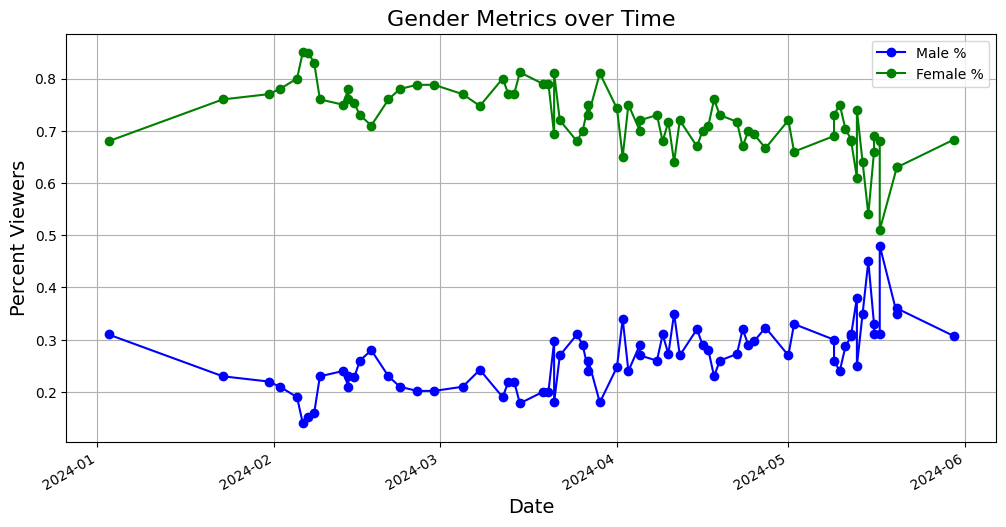

In [22]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot 'Male Viewer' vs 'Date'
plt.plot(df['Date'], df['Male Viewers'], marker='o', linestyle='-', color='blue', label='Male %')

# Plot 'Female Viewer' vs 'Date'
plt.plot(df['Date'], df['Female Viewers'], marker='o', linestyle='-', color='green', label='Female %')


# Formatting
plt.title('Gender Metrics over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percent Viewers', fontsize=14)
plt.grid(True)

# Add legend
plt.legend()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show plot
plt.show()

It seems that as time is progressing, more male viewers are taking interest in our content!

### 4. Video Duration & Average View Time V.S. Date

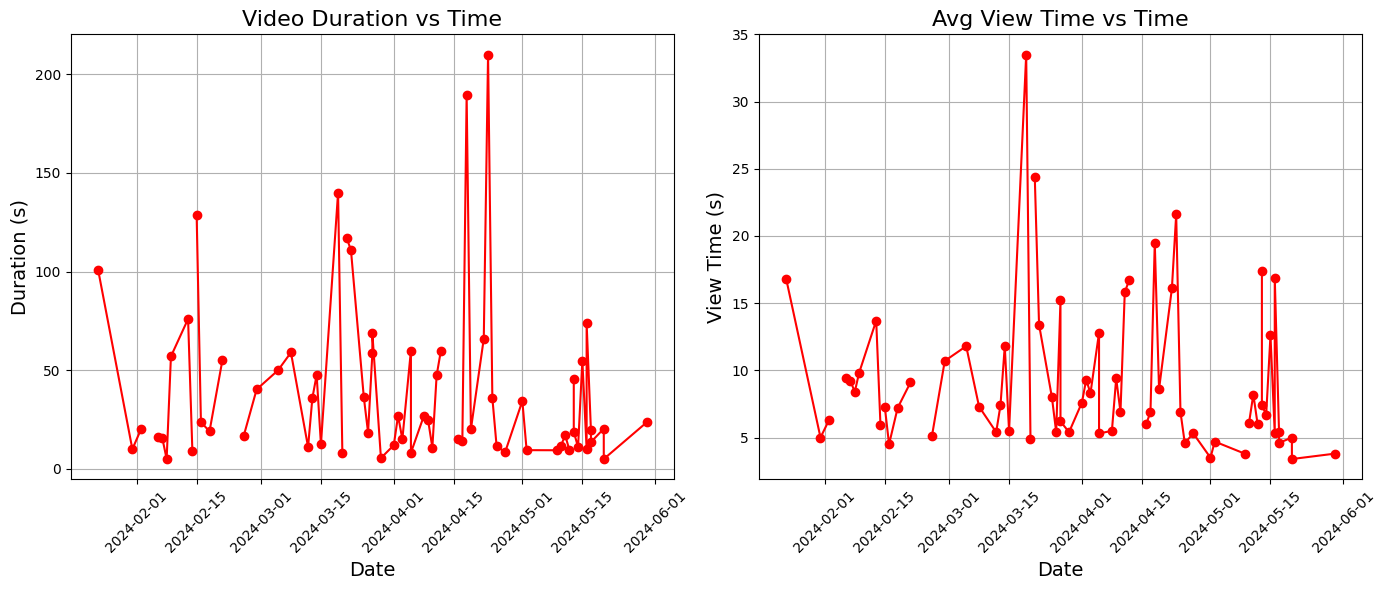

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot outliers
axes[0].plot(df['Date'], df['Video Duration (s)'], marker='o', linestyle='-', color='red')
axes[0].set_title('Video Duration vs Time', fontsize=16)
axes[0].set_xlabel('Date', fontsize=14)
axes[0].set_ylabel('Duration (s)', fontsize=14)
axes[0].grid(True)
# Rotate date labels for better readability
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)

# Plot normal data
axes[1].plot(df['Date'], df['Avg View Time (s)'], marker='o', linestyle='-', color='red')
axes[1].set_title('Avg View Time vs Time', fontsize=16)
axes[1].set_xlabel('Date', fontsize=14)
axes[1].set_ylabel('View Time (s)', fontsize=14)
axes[1].grid(True)
# Rotate date labels for better readability
for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)

# Show plot
plt.tight_layout()
plt.show()

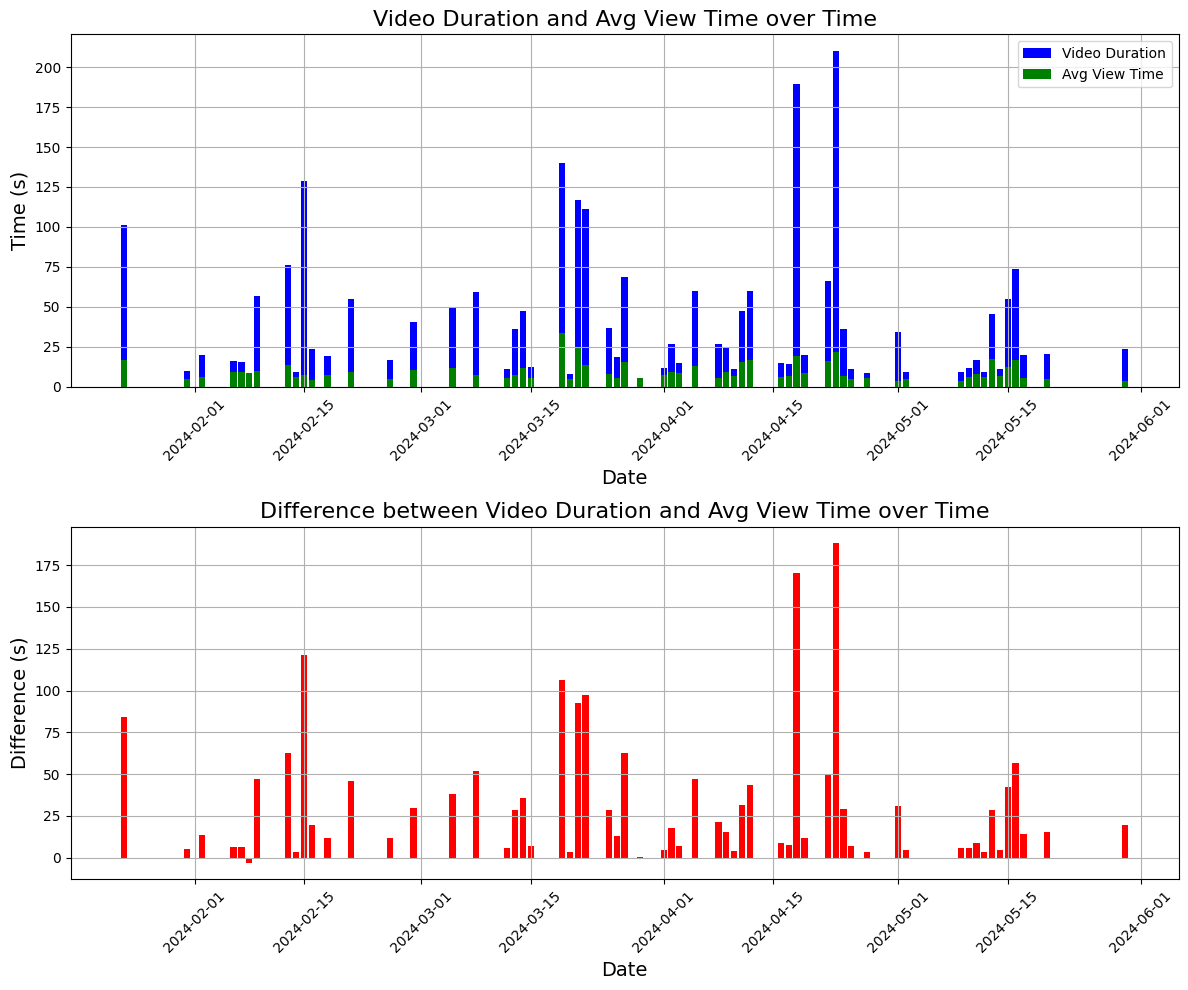

In [24]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Subplot 1: Bar graph for 'Male Viewer' and 'Female Viewer' over time
axes[0].bar(df['Date'], df['Video Duration (s)'], color='blue', label='Video Duration')
axes[0].bar(df['Date'], df['Avg View Time (s)'], color='green', label='Avg View Time')
axes[0].set_title('Video Duration and Avg View Time over Time', fontsize=16)
axes[0].set_xlabel('Date', fontsize=14)
axes[0].set_ylabel('Time (s)', fontsize=14)
axes[0].legend()
axes[0].grid(True)
# Subplot 2: Line graph for [video duration - average view time] over time
axes[1].bar(df['Date'], df['Video Duration (s)'] - df['Avg View Time (s)'], color='red')
axes[1].set_title('Difference between Video Duration and Avg View Time over Time', fontsize=16)
axes[1].set_xlabel('Date', fontsize=14)
axes[1].set_ylabel('Difference (s)', fontsize=14)
axes[1].grid(True)
# Rotate date labels for better readability
for ax in axes:
    ax.xaxis.set_tick_params(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

now lets perform these same graphs, but only for the content we consider 'viral':

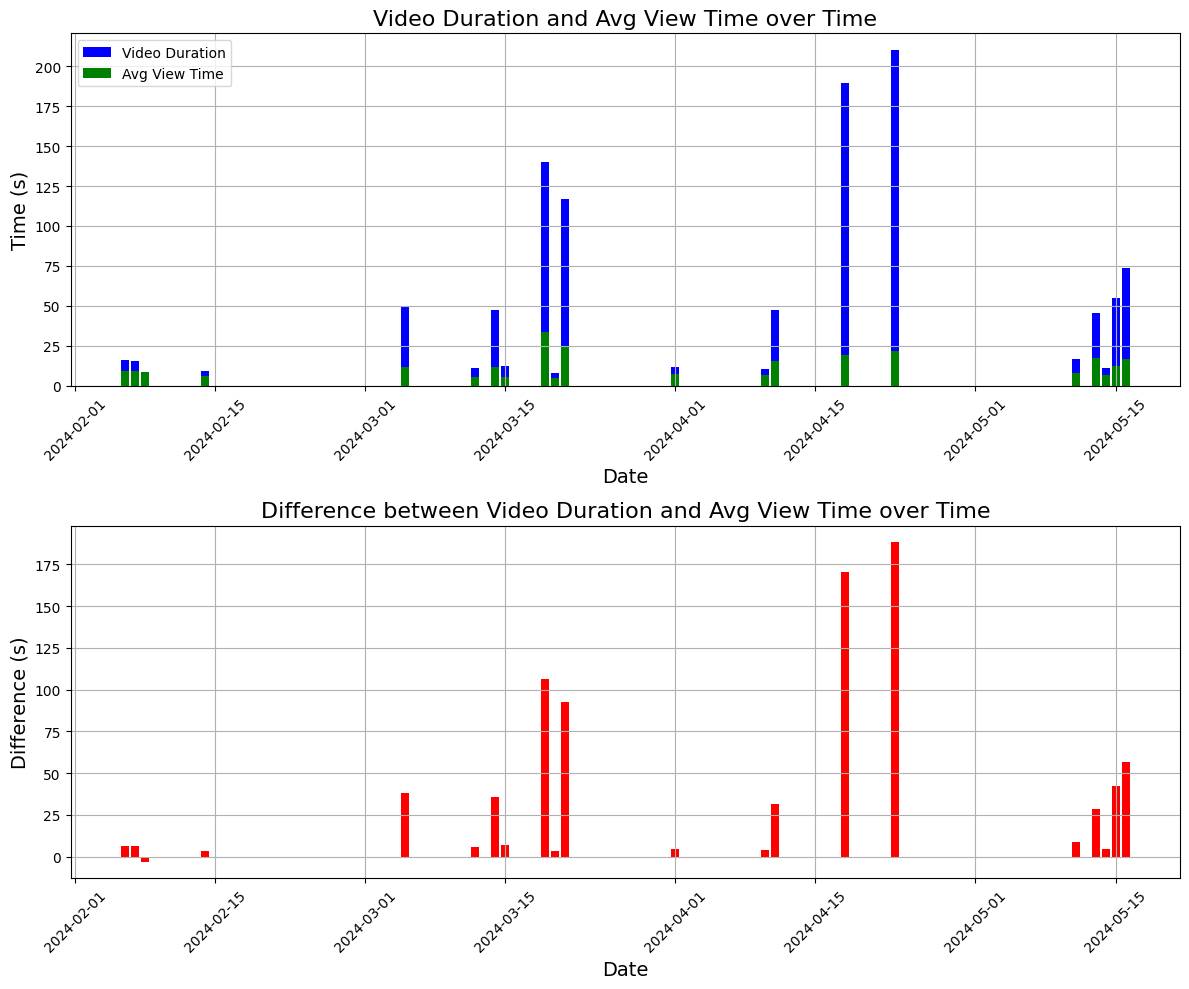

In [25]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Subplot 1: Bar graph for 'Male Viewer' and 'Female Viewer' over time
axes[0].bar(df[viral]['Date'], df[viral]['Video Duration (s)'], color='blue', label='Video Duration')
axes[0].bar(df[viral]['Date'], df[viral]['Avg View Time (s)'], color='green', label='Avg View Time')
axes[0].set_title('Video Duration and Avg View Time over Time', fontsize=16)
axes[0].set_xlabel('Date', fontsize=14)
axes[0].set_ylabel('Time (s)', fontsize=14)
axes[0].legend()
axes[0].grid(True)
# Subplot 2: Line graph for [video duration - average view time] over time
axes[1].bar(df[viral]['Date'], df[viral]['Video Duration (s)'] - df[viral]['Avg View Time (s)'], color='red')
axes[1].set_title('Difference between Video Duration and Avg View Time over Time', fontsize=16)
axes[1].set_xlabel('Date', fontsize=14)
axes[1].set_ylabel('Difference (s)', fontsize=14)
axes[1].grid(True)
# Rotate date labels for better readability
for ax in axes:
    ax.xaxis.set_tick_params(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Lets calculate the average duration of viral videos and the average view time of such, and then compare it to the average duration and view time of all videos!

In [26]:
# Calculate average duration and view time for viral videos
viral_avg_duration = df[viral]['Video Duration (s)'].mean()
viral_avg_view_time = df[viral]['Avg View Time (s)'].mean()
avg_duration = df['Video Duration (s)'].mean()
avg_view_time = df['Avg View Time (s)'].mean()

# Calculate average duration and view time for all videos
avg_duration = df['Video Duration (s)'].mean()
avg_view_time = df['Avg View Time (s)'].mean()

# Print the results
print("Average Duration of Viral Videos:", viral_avg_duration)
print("Average View Time of Viral Videos:", viral_avg_view_time)
print("Average Duration of All Videos:", avg_duration)
print("Average View Time of All Videos:", avg_view_time)

Average Duration of Viral Videos: 52.575714285714284
Average View Time of Viral Videos: 12.542857142857141
Average Duration of All Videos: 39.755
Average View Time of All Videos: 9.21060606060606


For us thus far, lengthier videos have culminated more likes and views, however the percentage of the video that gets viewed decreases exponentially.

### 5. New Followers V.S. Date

The following is our new followers feature graphed along dates from 1/3/24 to 5/30/24:


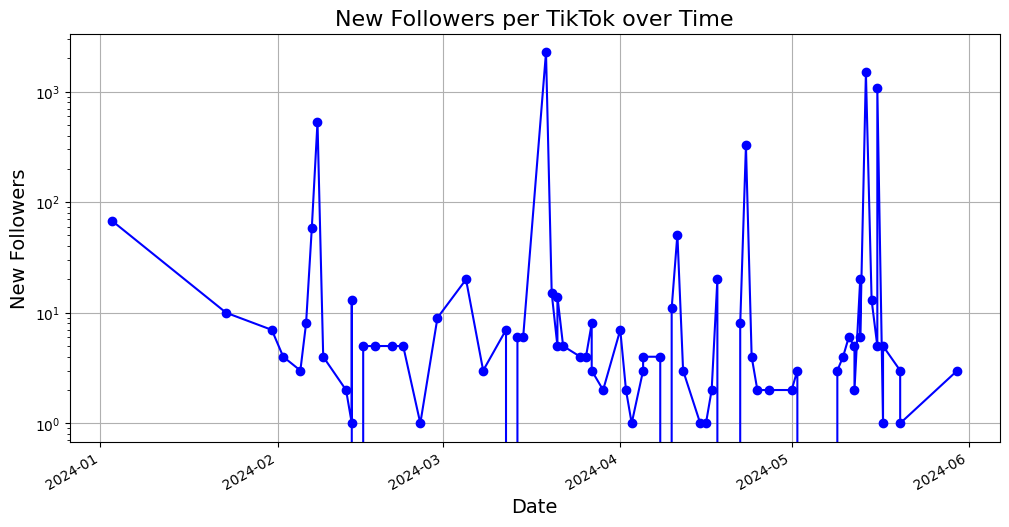

In [28]:
# Plot 'New Followers' vs 'Date'
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(df['Date'], df['New Followers'], marker='o', linestyle='-', color='blue')

# Formatting
plt.title('New Followers per TikTok over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('New Followers', fontsize=14)
plt.grid(True)
plt.yscale('log') 

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show plot
plt.show()

lets ignore our outliers, which would obviously attract more followers, and instead focus on our average content and see where it succeeds and/or falls flat:

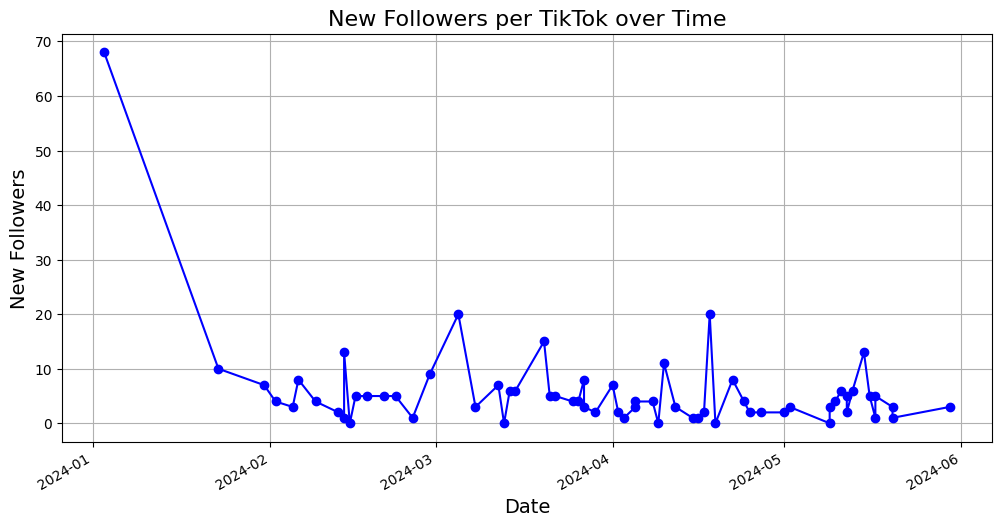

In [30]:
# Plot 'New Followers' vs 'Date'
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(df[normaldata]['Date'], df[normaldata]['New Followers'], marker='o', linestyle='-', color='blue')

# Formatting
plt.title('New Followers per TikTok over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('New Followers', fontsize=14)
plt.grid(True) 

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show plot
plt.show()

we can set as a benchmark, that videos perform well if they gain 10 or more new followers from the content.

Lets now graph new followers against: like_percentage, average view time, comments, shares, saves/bookmarks, and age groups

Correlation of 'New Followers Percentage' with 'View Time Percentage':
-0.2606623034099614

Correlation of 'New Followers' with other features:
New Followers      1.000000
Comments           0.973216
Shares             0.809671
Saves/Bookmarks    0.967877
Name: New Followers, dtype: float64


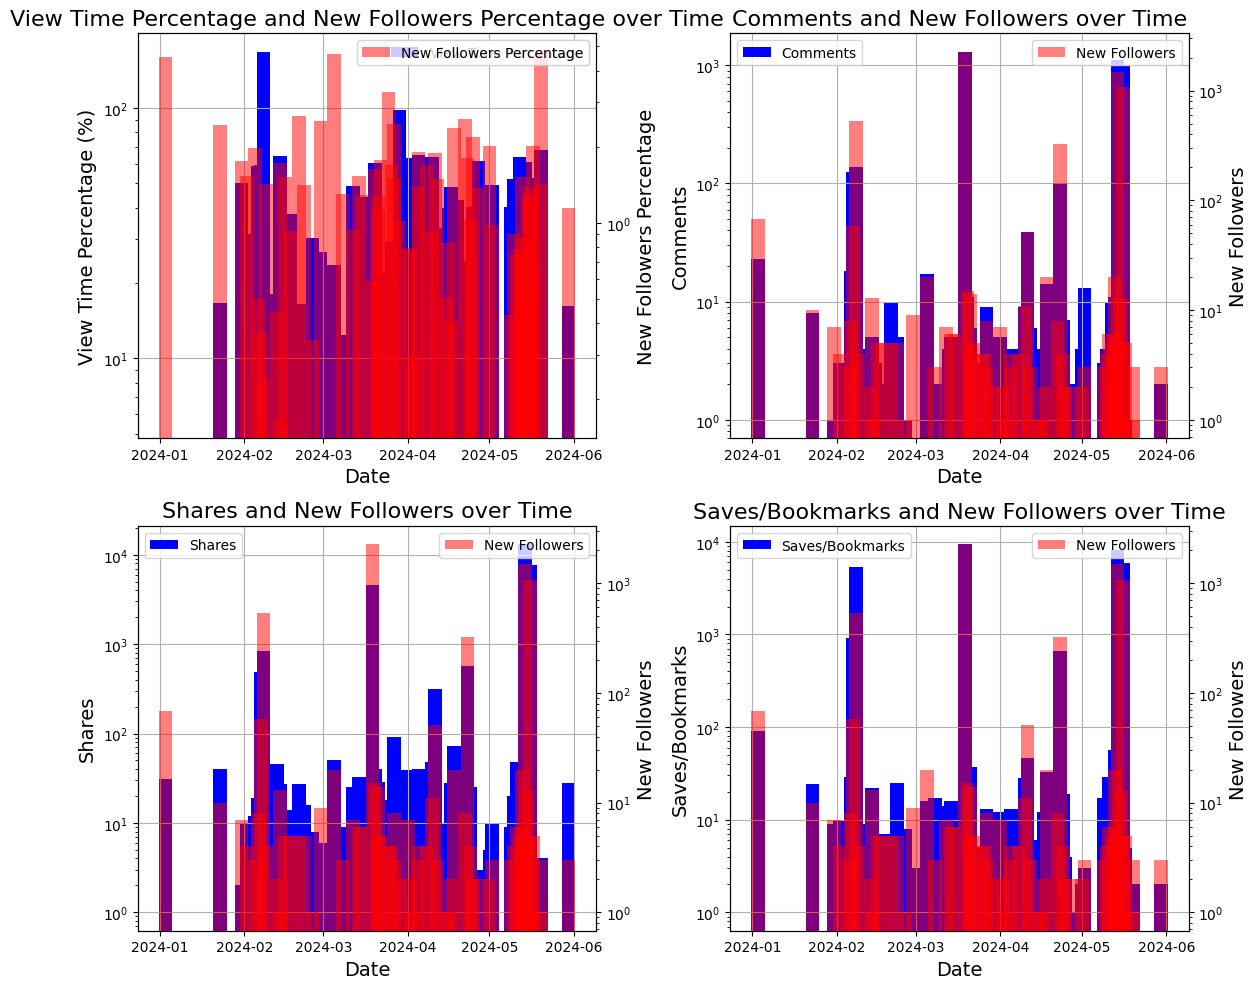

In [47]:
df['View Time Percentage'] = df['Avg View Time (s)'] / df['Video Duration (s)'] * 100
df['New Followers Percentage'] = df['New Followers'] / df['Likes'] * 100

# Calculate correlations
view_time_corr = df[['New Followers Percentage', 'View Time Percentage']].corr()['New Followers Percentage']['View Time Percentage']
other_corr = df[['New Followers', 'Comments', 'Shares', 'Saves/Bookmarks']].corr()['New Followers']

print("Correlation of 'New Followers Percentage' with 'View Time Percentage':")
print(view_time_corr)

print("\nCorrelation of 'New Followers' with other features:")
print(other_corr)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

bar_width = 5

# Subplot 1: View Time Percentage and New Followers Percentage over Time
axes[0, 0].bar(df['Date'], df['View Time Percentage'], color='blue', width=bar_width, label='View Time Percentage')
axes[0, 0].set_title('View Time Percentage and New Followers Percentage over Time', fontsize=16)
axes[0, 0].set_xlabel('Date', fontsize=14)
axes[0, 0].set_ylabel('View Time Percentage (%)', fontsize=14)
axes[0, 0].grid(True)
axes[0, 0].legend()
axes[0, 0].set_yscale('log')

# Plot New Followers Percentage
ax2 = axes[0, 0].twinx()
ax2.bar(df['Date'], df['New Followers Percentage'], color='red', width=bar_width, alpha=0.5, label='New Followers Percentage')
ax2.set_ylabel('New Followers Percentage', fontsize=14)
ax2.legend(loc='upper right')
ax2.set_yscale('log')

# Subplot 2: Comments and New Followers over Time
axes[0, 1].bar(df['Date'], df['Comments'], color='blue', width=bar_width, label='Comments')
axes[0, 1].set_title('Comments and New Followers over Time', fontsize=16)
axes[0, 1].set_xlabel('Date', fontsize=14)
axes[0, 1].set_ylabel('Comments', fontsize=14)
axes[0, 1].grid(True)
axes[0, 1].legend()
axes[0, 1].set_yscale('log')

# Plot New Followers
ax4 = axes[0, 1].twinx()
ax4.bar(df['Date'], df['New Followers'], color='red', width=bar_width, alpha=0.5, label='New Followers')
ax4.set_ylabel('New Followers', fontsize=14)
ax4.legend(loc='upper right')
ax4.set_yscale('log')

# Subplot 3: Shares and New Followers over Time
axes[1, 0].bar(df['Date'], df['Shares'], color='blue', width=bar_width, label='Shares')
axes[1, 0].set_title('Shares and New Followers over Time', fontsize=16)
axes[1, 0].set_xlabel('Date', fontsize=14)
axes[1, 0].set_ylabel('Shares', fontsize=14)
axes[1, 0].grid(True)
axes[1, 0].legend()
axes[1, 0].set_yscale('log')

# Plot New Followers
ax6 = axes[1, 0].twinx()
ax6.bar(df['Date'], df['New Followers'], color='red', width=bar_width, alpha=0.5, label='New Followers')
ax6.set_ylabel('New Followers', fontsize=14)
ax6.legend(loc='upper right')
ax6.set_yscale('log')

# Subplot 4: Saves/Bookmarks and New Followers over Time
axes[1, 1].bar(df['Date'], df['Saves/Bookmarks'], color='blue', width=bar_width, label='Saves/Bookmarks')
axes[1, 1].set_title('Saves/Bookmarks and New Followers over Time', fontsize=16)
axes[1, 1].set_xlabel('Date', fontsize=14)
axes[1, 1].set_ylabel('Saves/Bookmarks', fontsize=14)
axes[1, 1].grid(True)
axes[1, 1].legend()
axes[1, 1].set_yscale('log')

# Plot New Followers
ax8 = axes[1, 1].twinx()
ax8.bar(df['Date'], df['New Followers'], color='red', width=bar_width, alpha=0.5, label='New Followers')
ax8.set_ylabel('New Followers', fontsize=14)
ax8.legend(loc='upper right')
ax8.set_yscale('log')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

The discoveries here are interesting. The average percent of the video watch does not correlate to new followers, although one would initially believe those who watch more of a video would be more likely to follow. However, the truth of the matter is that new followers are much more correlated with extra interactions with the content (outside of likes), for example: comments, shares and saves!

### 6. Age Groups V.S. Date

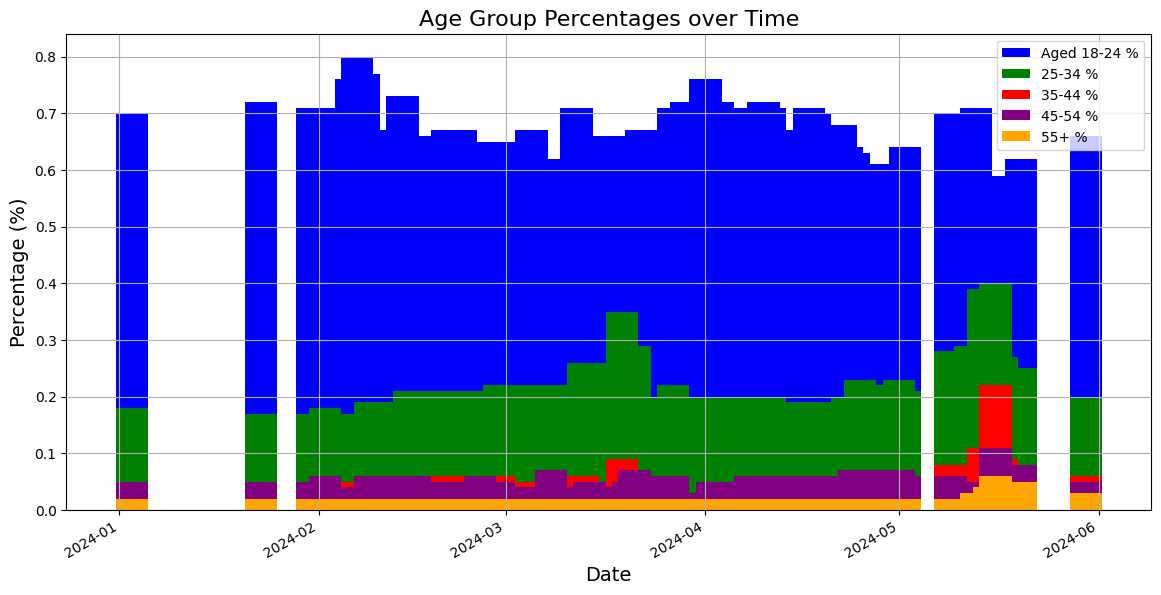

In [50]:


# Assuming df is your DataFrame

# Set the figure size
plt.figure(figsize=(14, 7))

bar_width = 5

# Plot 'Aged 18-24 %' vs 'Date'
plt.bar(df['Date'], df['Aged 18-24 %'], width=bar_width, color='blue', label='Aged 18-24 %')

# Plot '25-34 %' vs 'Date'
plt.bar(df['Date'], df['25-34 %'], width=bar_width, color='green', label='25-34 %')

# Plot '35-44 %' vs 'Date'
plt.bar(df['Date'], df['35-44 % '], width=bar_width, color='red', label='35-44 %')

# Plot '45-54 %' vs 'Date'
plt.bar(df['Date'], df['45-54 %'], width=bar_width, color='purple', label='45-54 %')

# Plot '55+ %' vs 'Date'
plt.bar(df['Date'], df['55+ %'], width=bar_width, color='orange', label='55+ %')

# Formatting
plt.title('Age Group Percentages over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.grid(True)

# Add legend
plt.legend()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show plot
plt.show()

Whilst our main audience is expected: Those aged 18-24 have held a consistent 60-80% of our viewership, there are two spikes in which members aged 25-34 hold a viewership that makes up more than 30% of all interactions, and those were for Match Day and Commencement content. This makes sense because those topics of content illude to higher levels of education and maturing. Many viewers older than student-age can view such content for nostalgia purposes and/or because their children or younger siblings are being featured/involved in the content.

### 7. New Viewers v.s. Date

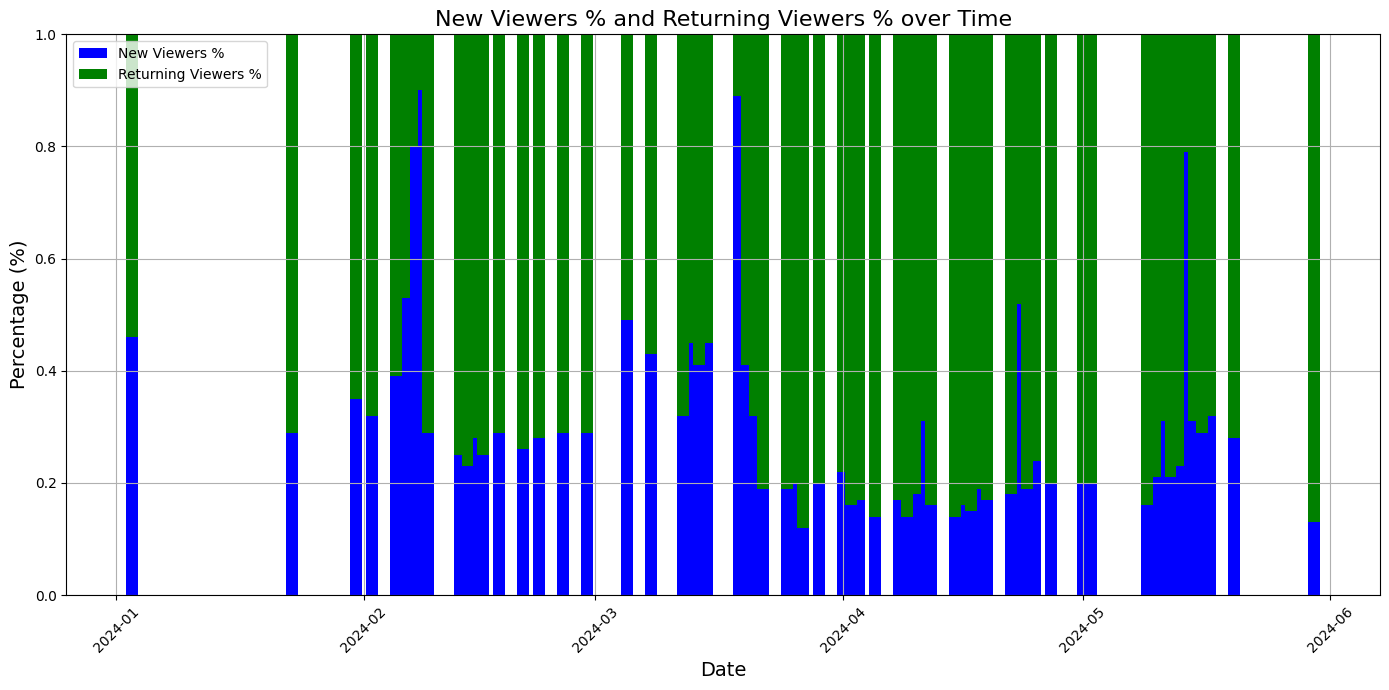

In [56]:
df['Returning Viewers %'] = 1 - df['New Viewers %']

# Set the figure size
plt.figure(figsize=(14, 7))

# Plot 'New Viewers %' vs 'Date'
plt.bar(df['Date'], df['New Viewers %'], width=1.5, color='blue', label='New Viewers %')

# Plot 'Returning Viewers %' vs 'Date' (stacked below New Viewers %)
plt.bar(df['Date'], df['Returning Viewers %'], width=1.5, bottom=df['New Viewers %'], color='green', label='Returning Viewers %')

# Formatting
plt.title('New Viewers % and Returning Viewers % over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limit to [0, 1] since both percentages should sum to 1
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

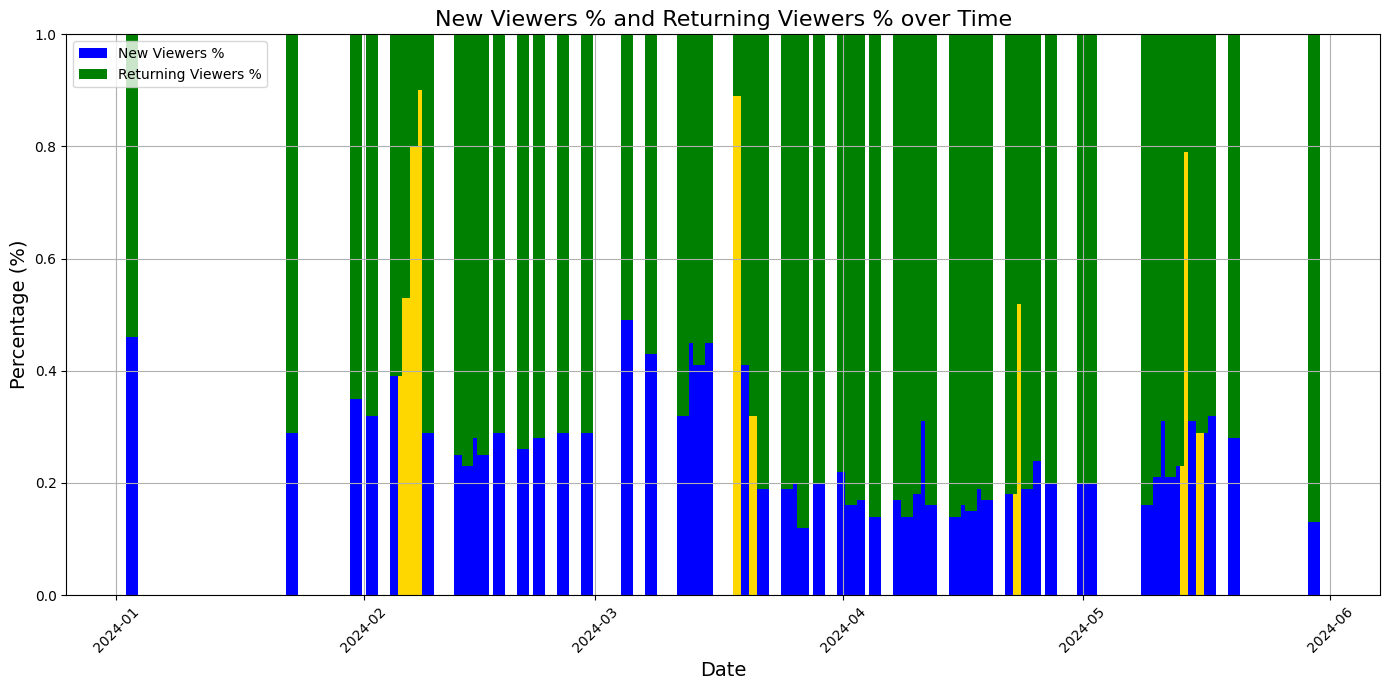

In [60]:
# Create the temporary variable 'Returning Viewers %'
df['Returning Viewers %'] = 1 - df['New Viewers %']

# Set the figure size
plt.figure(figsize=(14, 7))

# Plot 'New Viewers %' vs 'Date'
above_avg_color = 'gold'  # Define a brighter color for New Viewers % above average
plt.bar(df['Date'], df['New Viewers %'], width=01.5, color=[above_avg_color if x > .5 else 'blue' for x in df['New Viewers %']], label='New Viewers %')

# Plot 'Returning Viewers %' vs 'Date' (stacked below New Viewers %)
plt.bar(df['Date'], df['Returning Viewers %'], width=01.5, bottom=df['New Viewers %'], color='green', label='Returning Viewers %')

# Formatting
plt.title('New Viewers % and Returning Viewers % over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limit to [0, 1] since both percentages should sum to 1
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

A good benchmark for videos that perform best, and attract more new viewers, would be videos above 50% (as marked in gold above)

In [67]:
# Filter the DataFrame for good viewers
good_viewers_df = df[df['New Viewers %'] > 0.05]

# Calculate the correlation matrix
correlation_matrix_good_viewers = good_viewers_df.corr()

# If you're interested in the correlation of 'New Viewers %' with other features:
new_viewers_corr_good_viewers = correlation_matrix_good_viewers['New Viewers %'].drop('New Viewers %')

print("\nCorrelation of 'New Viewers %' with other features for good viewers:")
print(new_viewers_corr_good_viewers)



Correlation of 'New Viewers %' with other features for good viewers:
ID                         -0.230698
Views                       0.643905
Likes                       0.674002
Comments                    0.612965
Shares                      0.526592
Saves/Bookmarks             0.699758
Male Viewers               -0.245182
Female Viewers              0.253138
Video Duration (s)          0.167007
Avg View Time (s)           0.346627
New Followers               0.644592
Aged 18-24 %               -0.266443
25-34 %                     0.435437
35-44 %                     0.264748
45-54 %                    -0.214899
55+ %                       0.198108
Non Followers %             0.706260
Like_Percent                0.545078
View Time Percentage        0.276941
New Followers Percentage    0.010417
Returning Viewers %        -1.000000
Name: New Viewers %, dtype: float64


C:\Users\Lionb\AppData\Local\Temp\ipykernel_23772\722877654.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_good_viewers = good_viewers_df.corr()


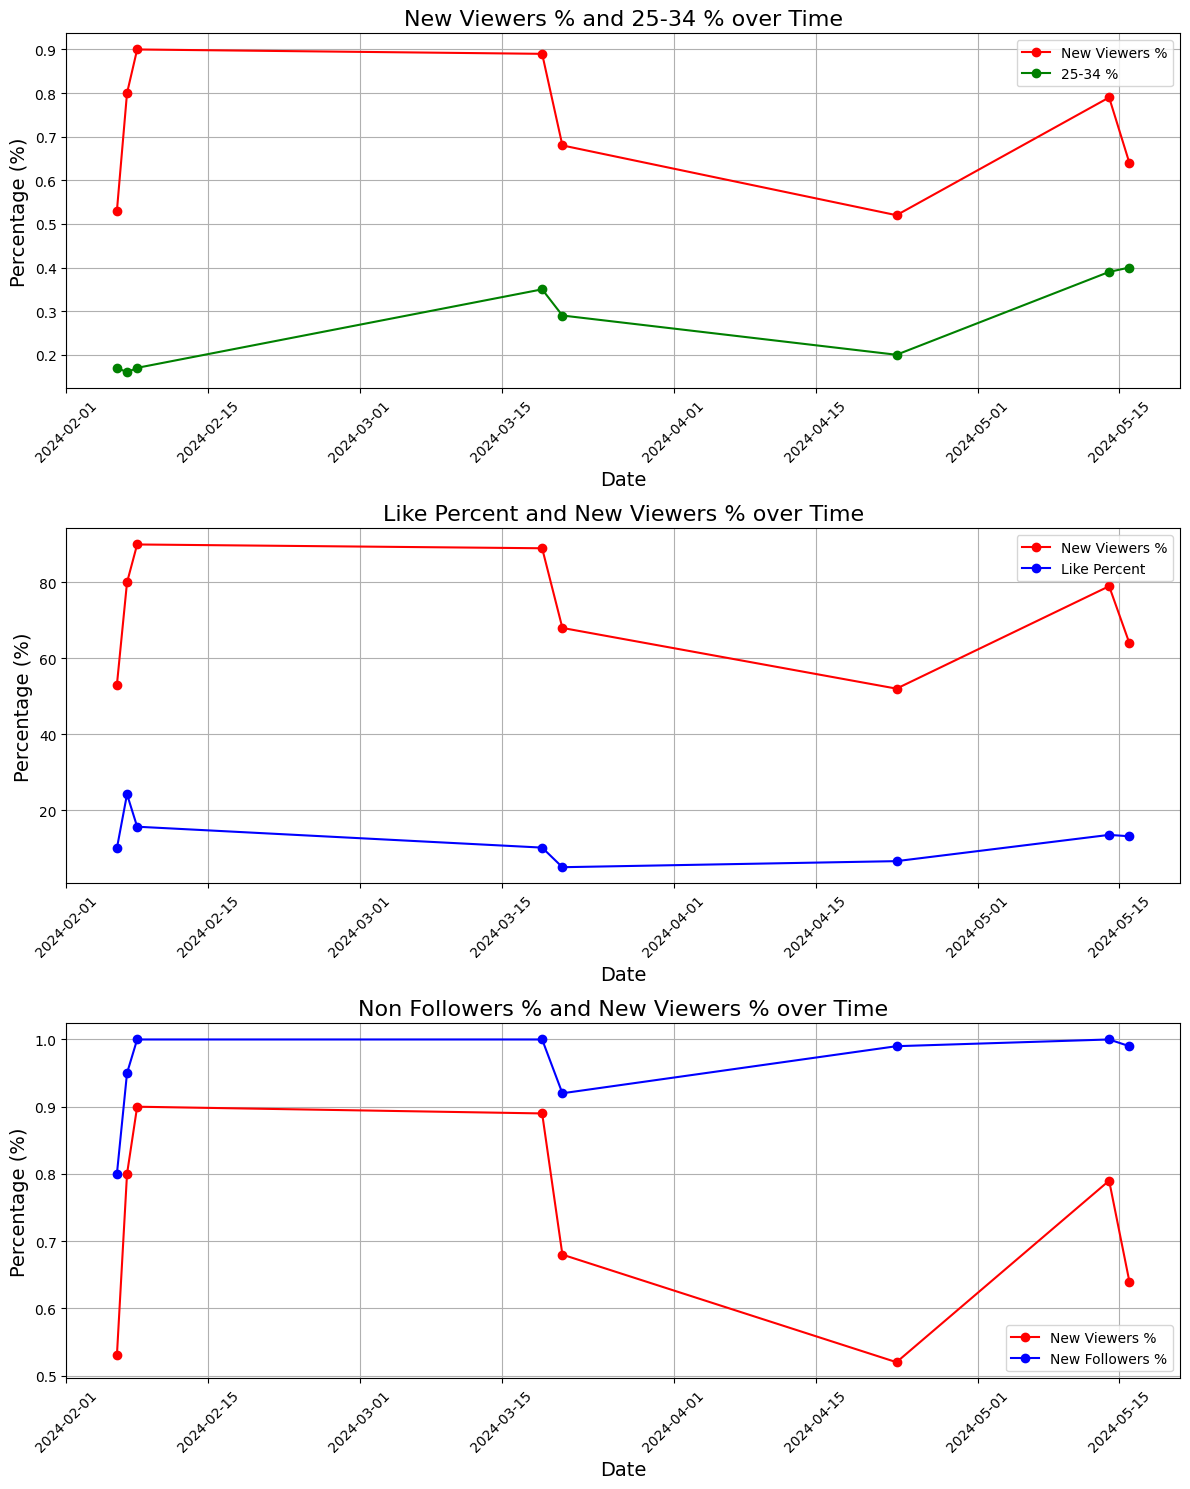

In [75]:
import matplotlib.pyplot as plt

# Filter the DataFrame for new viewers percentage > 50%
good_viewers_df = df[df['New Viewers %'] > .50]

# Set up the subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Plot 'New Viewers %' and '25-34 %' vs 'Date'
axes[0].plot(good_viewers_df['Date'], good_viewers_df['New Viewers %'], marker='o', linestyle='-', color='red', label='New Viewers %')
axes[0].plot(good_viewers_df['Date'], good_viewers_df['25-34 %'], marker='o', linestyle='-', color='green', label='25-34 %')
axes[0].set_title('New Viewers % and 25-34 % over Time', fontsize=16)
axes[0].set_xlabel('Date', fontsize=14)
axes[0].set_ylabel('Percentage (%)', fontsize=14)
axes[0].legend()
axes[0].grid(True)

# Plot 'New Followers %' and 'New Viewers %' vs 'Date'
axes[2].plot(good_viewers_df['Date'], good_viewers_df['New Viewers %'], marker='o', linestyle='-', color='red', label='New Viewers %')
axes[2].plot(good_viewers_df['Date'], good_viewers_df['Non Followers %'], marker='o', linestyle='-', color='blue', label='New Followers %')
axes[2].set_title('Non Followers % and New Viewers % over Time', fontsize=16)
axes[2].set_xlabel('Date', fontsize=14)
axes[2].set_ylabel('Percentage (%)', fontsize=14)
axes[2].legend()
axes[2].grid(True)

# Plot 'Like_Percent' and 'New Viewers %' vs 'Date'
axes[1].plot(good_viewers_df['Date'], good_viewers_df['New Viewers %'] * 100, marker='o', linestyle='-', color='red', label='New Viewers %')
axes[1].plot(good_viewers_df['Date'], good_viewers_df['Like_Percent'], marker='o', linestyle='-', color='blue', label='Like Percent')
axes[1].set_title('Like Percent and New Viewers % over Time', fontsize=16)
axes[1].set_xlabel('Date', fontsize=14)
axes[1].set_ylabel('Percentage (%)', fontsize=14)
axes[1].legend()
axes[1].grid(True)

# Rotate date labels for better readability
for ax in axes:
    ax.xaxis.set_tick_params(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

It is apparent that videos where over 50% of the reach hits new viewers, also have high like percentages, interactions with members 25-34, and non-followers (which should be a given). I wonder if when we look at our categorical data, if certain categories have higher average new viewers percentages.

### 8. Non Followers % v.s Date

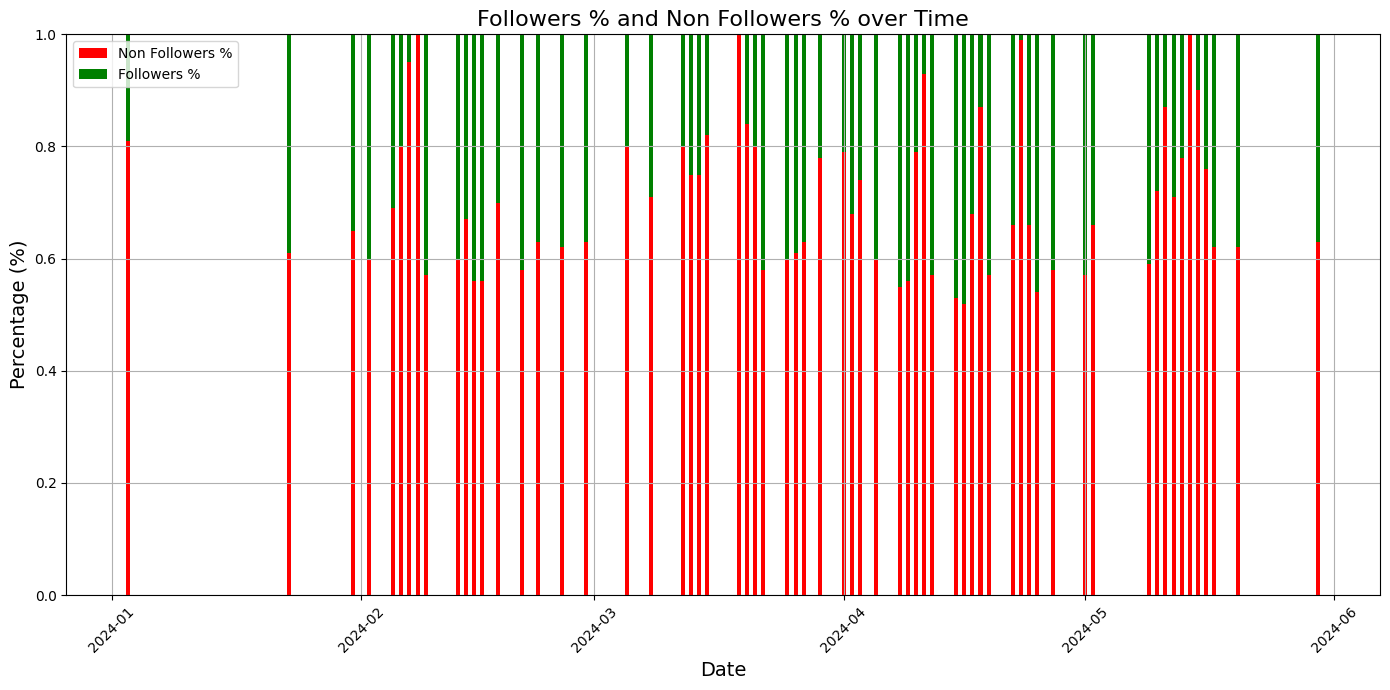

In [86]:
# Set the figure size
plt.figure(figsize=(14, 7))

df['Followers %'] = 1 - df['Non Followers %']
# Plot 'Followers %' vs 'Date'
above_avg_color = 'red'  # Define a brighter color for Followers % above average
plt.bar(df['Date'], df['Non Followers %'], width=0.5, color=above_avg_color, label='Non Followers %')

# Plot 'Non Followers %' vs 'Date' (stacked below Followers %)
plt.bar(df['Date'], df['Followers %'], width=0.5, bottom=df['Non Followers %'], color='green', label='Followers %')

# Formatting
plt.title('Followers % and Non Followers % over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limit to [0, 1] since both percentages should sum to 1
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

It is safe to say that videos that get views from 75% or more non followers are considered of higher performance.

### To Conclude Part I:
We have found multiple thresholds that can indicate when a video is performing well:
1) Views greater than 10k
2) Like Percentage greater than 10%
3) Male Viewer Percentage greater than 32%4) 
Average View Time ofwell performinglvideoss: 12. seconds
5) 10 or more new followers per video
6) Viewer Percentage of those aged 25 to 34 exceeds 30%
7) New Viewer Percentage exceeds 50%
8) Non-Follower Percentage exceeds 75%

Let's create a dataset including just videos that contain any of those features:1

In [132]:
performing_well = df[
    (df['Views'] > 10000) |
    (df['Like_Percent'] > 10) |
    (df['Male Viewers'] > .32) |
    (df['Avg View Time (s)'] > 12.6) |
    (df['New Followers'] >= 10) |
    (df['25-34 %'] > .3) |
    (df['New Viewers %'] > .50) |
    (df['Non Followers %'] > .75)
]

numerical_columns = performing_well.select_dtypes(include=['number'])

# Display numerical columns
numerical_columns.head(42)

,ID,Views,Likes,Comments,Shares,Saves/Bookmarks,Male Viewers,Female Viewers,Video Duration (s),Avg View Time (s),New Followers,Aged 18-24 %,25-34 %,35-44 %,45-54 %,55+ %,New Viewers %,Non Followers %,Like_Percent,View Time Percentage,New Followers Percentage,Returning Viewers %,Followers %
0,1,19200.0,1500,23,31,90,0.3100,0.6800,NaN,NaN,68,0.70,0.18,0.05,0.05,0.02,0.46,0.81,7.812500,NaN,4.533333,0.54,0.19
1,2,7800.0,410,8,40,24,0.2300,0.7600,101.00,16.8,10,0.72,0.17,0.04,0.05,0.02,0.29,0.61,5.256410,16.633663,2.439024,0.71,0.39
5,6,16100.0,1600,18,19,29,0.1400,0.8500,16.00,9.4,8,0.76,0.17,0.03,0.03,0.02,0.53,0.80,9.937888,58.750000,0.500000,0.47,0.20
6,7,65400.0,15800,126,491,916,0.1515,0.8485,15.50,9.2,58,0.80,0.16,0.02,0.01,0.02,0.80,0.95,24.159021,59.354839,0.367089,0.20,0.05
7,8,1400000.0,218500,137,838,5400,0.1600,0.8300,5.00,8.4,531,0.77,0.17,0.03,0.02,0.02,0.90,1.00,15.607143,168.000000,0.243021,0.10,0.00
9,10,6700.0,451,2,46,9,0.2400,0.7500,76.00,13.7,2,0.67,0.19,0.05,0.06,0.02,0.25,0.60,6.731343,18.026316,0.443459,0.75,0.40
10,11,11900.0,602,5,15,6,0.2100,0.7800,9.20,5.9,1,0.73,0.17,0.04,0.04,0.02,0.28,0.80,5.058824,64.130435,0.166113,0.72,0.20
11,12,8400.0,753,1,27,22,0.2300,0.7600,NaN,NaN,13,0.72,0.18,0.04,0.04,0.02,0.23,0.67,8.964286,NaN,1.726428,0.77,0.33
19,20,13300.0,428,17,50,16,0.2100,0.7700,50.00,11.8,20,0.67,0.22,0.05,0.04,0.02,0.49,0.80,3.218045,23.600000,4.672897,0.51,0.20
21,22,11400.0,746,2,25,14,0.1900,0.8000,11.07,5.4,7,0.71,0.19,0.04,0.04,0.02,0.32,0.80,6.543860,48.780488,0.938338,0.68,0.20


One of the best methods of utilizing numberical data is to locate the thresholds that indicate the best performance of content. With this, we have now located 42 out of our 74 videos, that in some way or another, exceeded a threshold that indicated success in spreading WashU's messaging and content.

## II) Exploring Categorical Features